# Demand Forecasting

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
import pandas as pd


In [2]:
#Dataframing the Dataset

In [3]:
df=pd.read_excel('D:\Datasets\Sample - Superstore.xls')


In [4]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [5]:
#Displaying the rows and columns

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
#Printing the information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
#Working on a particular Category=Office Supplies

In [10]:
Office_Supplies=df.loc[df['Category']=='Office Supplies']

In [11]:
Office_Supplies['Order Date'].min(),Office_Supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [12]:
#Checking for columns

In [13]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

In [14]:
Office_Supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [15]:
#Sorting values

In [16]:
Office_Supplies=Office_Supplies.sort_values('Order Date')

In [17]:
#Checking for null values

In [18]:
Office_Supplies.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [19]:
#Indexing with Time Series

In [20]:
Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [21]:
Office_Supplies=Office_Supplies.set_index('Order Date')

In [22]:
y=Office_Supplies['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01    212.742890
2017-02-01    125.555458
2017-03-01    100.346800
2017-04-01    113.324744
2017-05-01     94.088795
2017-06-01    113.503617
2017-07-01     81.931744
2017-08-01    210.208755
2017-09-01    112.309306
2017-10-01    135.512894
2017-11-01    117.873921
2017-12-01    108.316520
Freq: MS, Name: Sales, dtype: float64


In [23]:
#Visualization

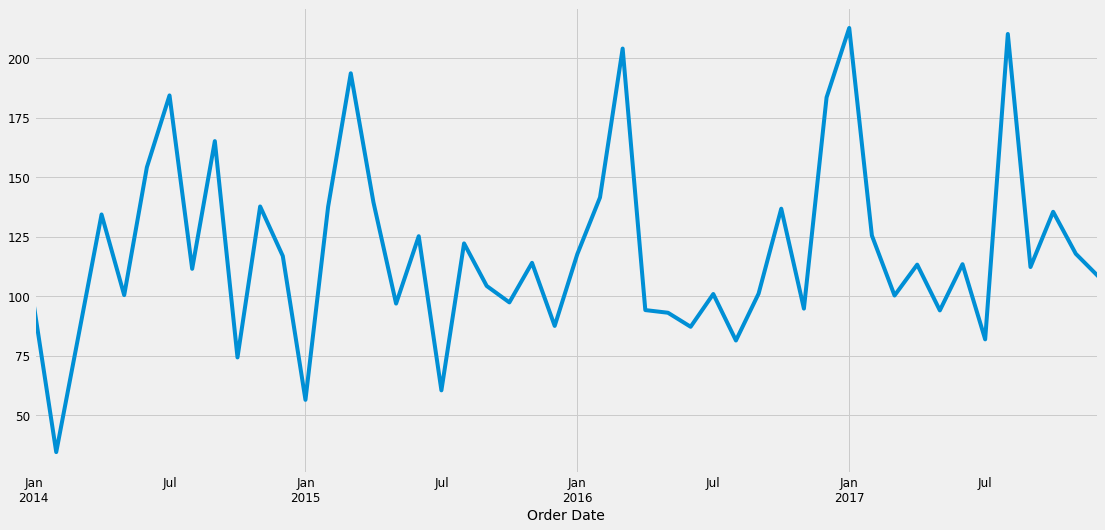

In [24]:
y.plot(figsize=(17,8))
plt.show()

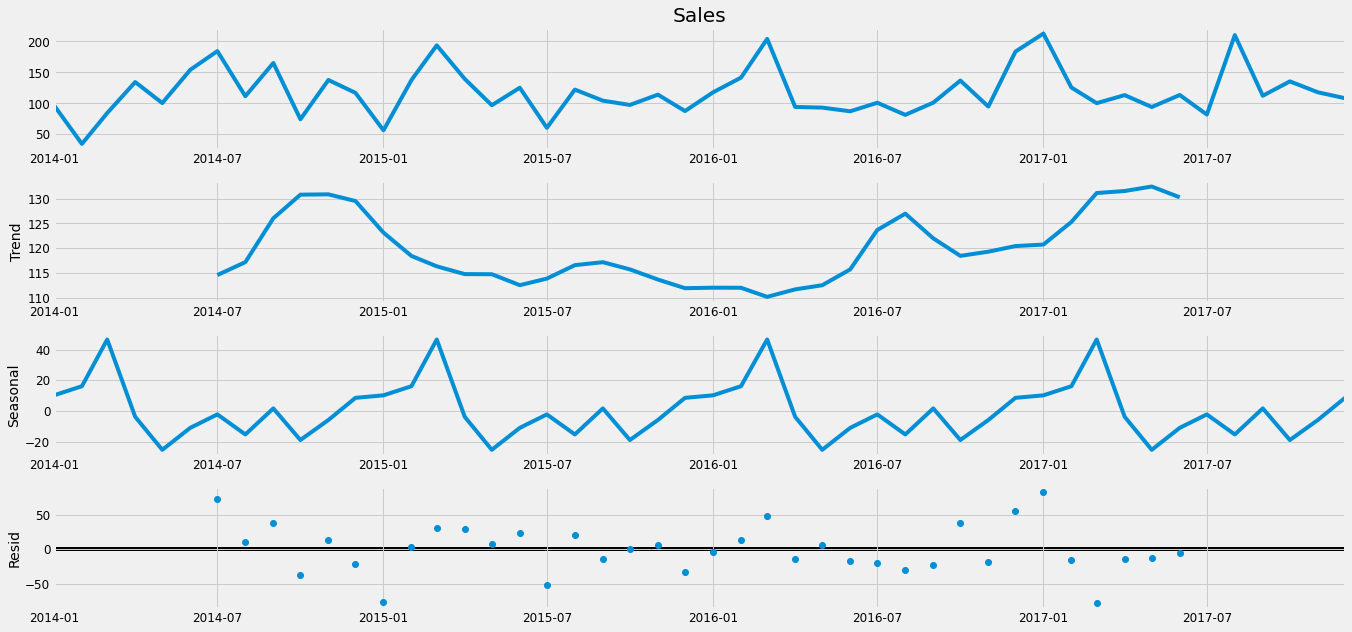

In [25]:
from pylab import rcParams
rcParams['figure.figsize']=19,9
decomposition=sm.tsa.seasonal_decompose(y,model='addictive')
fig=decomposition.plot()
plt.show()

In [26]:
#Time series Forecasting with ARIMA

In [27]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [28]:
print('Example of parameter combination for seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Example of parameter combination for seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [29]:
#Fitting ARIMA Model

In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(Y,
                                         order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue
mod=sm.tsa.statespace.SARIMAX(y,
                             order=(1,1,1),
                             seasonal_order=(1,1,0,12),
                             enforce_stationarity=True,
                             enforce_invertibility=False)


In [31]:
results=mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1504      0.232      0.647      0.517      -0.305       0.606
ma.L1         -1.0000      0.318     -3.143      0.002      -1.624      -0.376
ar.S.L12      -0.3392      0.272     -1.249      0.212      -0.871       0.193
sigma2      2874.4644      0.000    2.6e+07      0.000    2874.464    2874.465


In [32]:
#Running model diagnostics to investigate any unusual behaviour

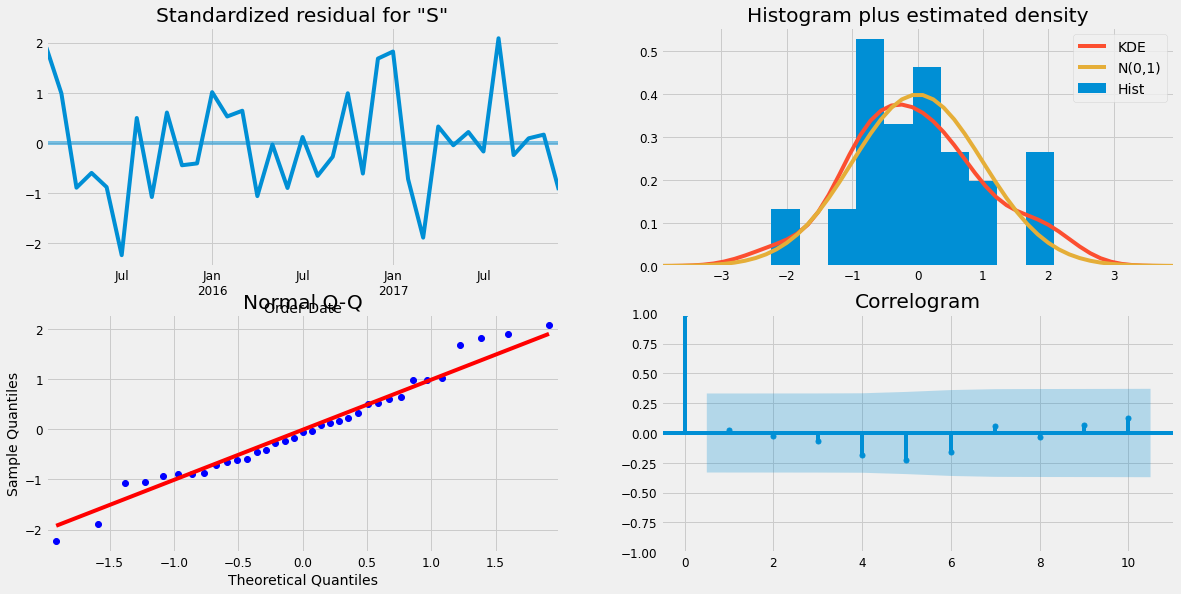

In [33]:
results.plot_diagnostics(figsize=(18,9))
plt.show()

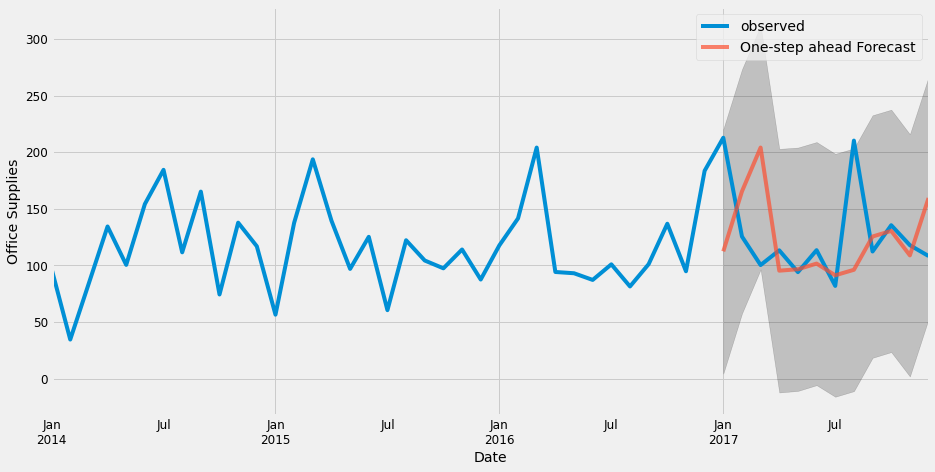

In [34]:
pred=results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [35]:
y_forecasted=pred.predicted_mean
y_truth=y['2017-01-01':]
mse=((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forecasts is 3239.23
The Root Mean Squared Error of our forecasts is 56.91


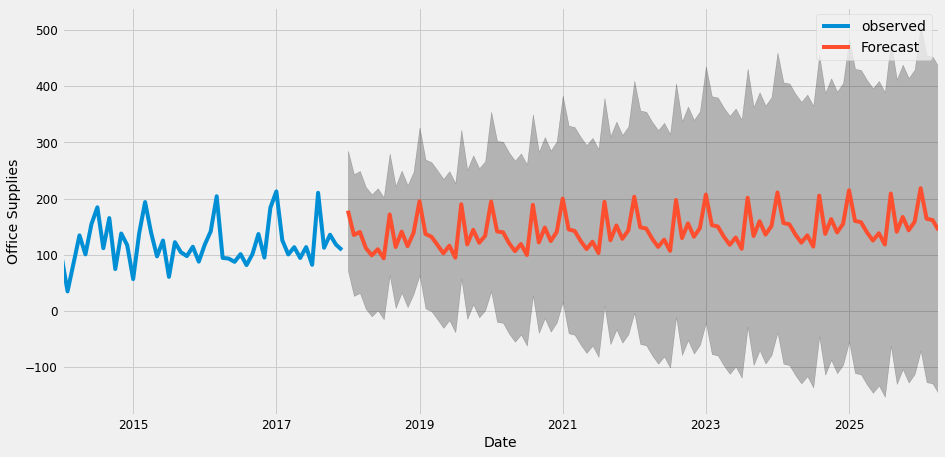

In [36]:
pred_uc=results.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [37]:
#Comparing with other categories

In [38]:
office_supplies=df.loc[df['Category'] == 'Office Supplies']
furniture=df.loc[df['Category'] == 'Furniture']
office_supplies.shape,furniture.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount',
       'Profit']
office_supplies.drop(cols,axis=1,inplace=True)
furniture.drop(cols,axis=1,inplace=True)
office_supplies=office_supplies.sort_values('Order Date')
furniture=furniture.sort_values('Order Date')
office_supplies=office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies=office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies=office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.set_index('Order Date')
furniture=furniture.set_index('Order Date')

In [39]:
#furniture=furniture.set_index('Order Date', inplace =True)

In [40]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [41]:
office_supplies.set_index('Order Date',inplace = True)

In [42]:
office_supplies.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [43]:
y_office_supplies=office_supplies['Sales'].resample('MS').mean()
y_furniture=furniture['Sales'].resample('MS').mean()
office_supplies=pd.DataFrame({'Order Date': y_office_supplies.index,'Sales' : y_office_supplies.values})
furniture=pd.DataFrame({'Order Date' : y_furniture.index,'Sales' : y_furniture.values})
store=office_supplies.merge(office_supplies,how='inner',on='Order Date')
store.rename(columns= {'Sales_x': 'Office Supplies_sales','Sale_y':'furniture_sales'},inplace=True)
store.head()

,Order Date,Office Supplies_sales,Sales_y
0,2014-01-01,285.357647,285.357647
1,2014-02-01,63.042588,63.042588
2,2014-03-01,391.176318,391.176318
3,2014-04-01,464.794750,464.794750
4,2014-05-01,324.346545,324.346545


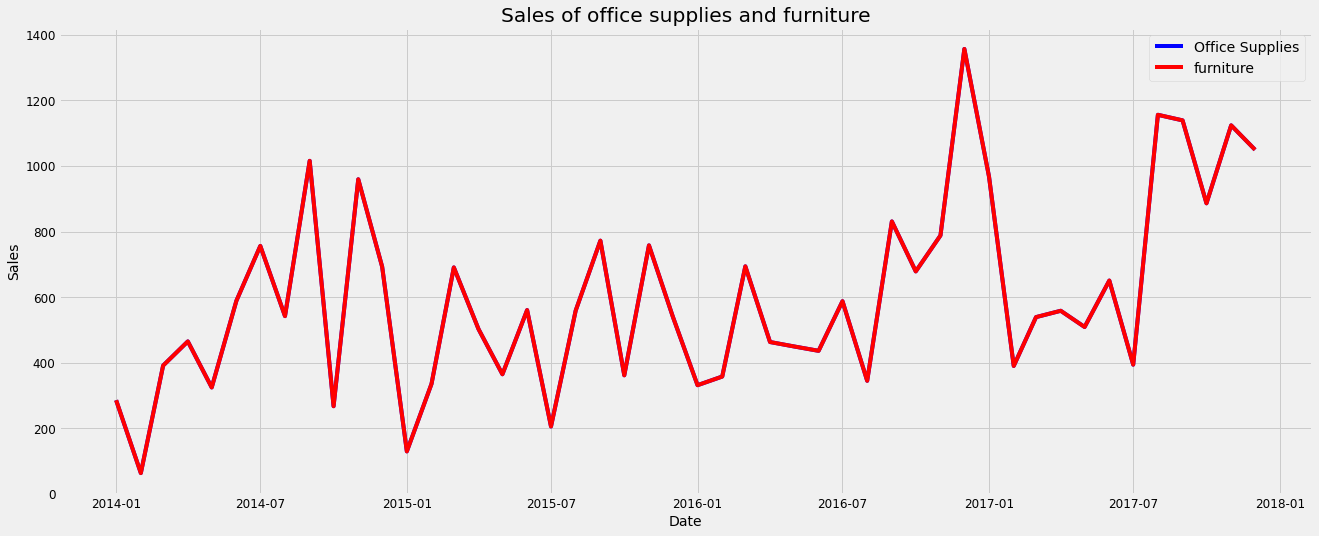

In [44]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['Office Supplies_sales'],'b-',label='Office Supplies')
plt.plot(store['Order Date'],store['Sales_y'],
         'r-',label='furniture')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of office supplies and furniture')
plt.legend()

In [45]:
#Timw Series Modelling With Prophet

In [46]:
from prophet import Prophet

In [47]:
office_supplies=office_supplies.rename(columns ={'Order Date': 'ds','Sales':'y'})
office_supplies_model=Prophet(interval_width = 0.95)

In [48]:
office_supplies.head(2)

,ds,y
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [49]:
office_supplies.rename(columns={'Order Date':'ds'},inplace=True)

In [50]:
office_supplies.head(2)

,ds,y
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [51]:
office_supplies_model.fit(office_supplies)

00:51:40 - cmdstanpy - INFO - Chain [1] start processing
00:51:41 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
furniture.head(2)

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [53]:
furniture=furniture.rename(columns={'Order Date':'ds','Sales':'y'})
furniture.head(2)

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [54]:
furniture_model=Prophet(interval_width=0.95)
furniture_model.fit(furniture)

00:51:46 - cmdstanpy - INFO - Chain [1] start processing
00:51:46 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
office_supplies_forecast=office_supplies_model.make_future_dataframe(periods=36,freq='MS')
office_supplies_forecast=office_supplies_model.predict(office_supplies_forecast)
furniture_forecast=furniture_model.make_future_dataframe(periods=36,freq='MS')
furniture_forecast=furniture_model.predict(furniture_forecast)

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 720x432 with 0 Axes>

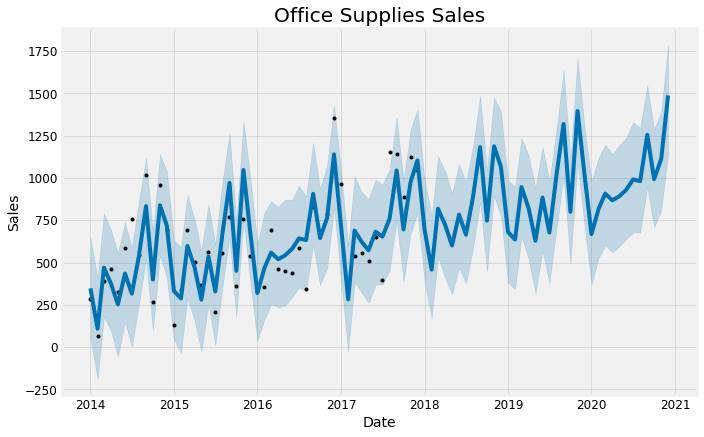

In [56]:
plt.figure(figsize=(10,6))
office_supplies_model.plot(office_supplies_forecast,xlabel='Date',ylabel='Sales')
plt.title('Office Supplies Sales')

In [57]:
#Compare Forecasts

In [58]:
office_supplies_names = ['office_supplies_%s' %
                        column for column in office_supplies_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_supplies_forecast = office_supplies_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()
office_supplies_forecast.columns = office_supplies_names
merge_furniture_forecast.columns = furniture_names
#forecast = pd.merge(office_supplies_forecast,merge_furniture_forecast,how='inner',left_on='office_supplies_ds',right_on='furniture_ds')
#forecast = forecast.rename(columns={'office_supplies_ds': 'Date'}).drop('furniture_ds', axis=1)
#forecast.head()

In [59]:
office_supplies_forecast

,office_supplies_ds,office_supplies_trend,office_supplies_yhat_lower,office_supplies_yhat_upper,office_supplies_trend_lower,office_supplies_trend_upper,office_supplies_additive_terms,office_supplies_additive_terms_lower,office_supplies_additive_terms_upper,office_supplies_yearly,office_supplies_yearly_lower,office_supplies_yearly_upper,office_supplies_multiplicative_terms,office_supplies_multiplicative_terms_lower,office_supplies_multiplicative_terms_upper,office_supplies_yhat
0,2014-01-01,487.530485,50.671319,644.772039,487.530485,487.530485,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,494.918166,-186.307627,410.978339,494.918166,494.918166,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,501.590911,180.526725,791.538290,501.590911,501.590911,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,508.978592,93.302207,691.310975,508.978592,508.978592,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,516.127962,-54.437957,555.218367,516.127962,516.127962,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-08-01,1060.994640,679.771518,1296.546623,1060.908654,1061.083548,-79.557633,-79.557633,-79.557633,-79.557633,-79.557633,-79.557633,0.0,0.0,0.0,981.437007
80,2020-09-01,1068.393023,947.458803,1548.784684,1068.303484,1068.486248,186.933643,186.933643,186.933643,186.933643,186.933643,186.933643,0.0,0.0,0.0,1255.326666
81,2020-10-01,1075.552748,707.735857,1288.265871,1075.458701,1075.649974,-82.396901,-82.396901,-82.396901,-82.396901,-82.396901,-82.396901,0.0,0.0,0.0,993.155847
82,2020-11-01,1082.951131,808.877570,1392.123072,1082.854356,1083.052447,30.013623,30.013623,30.013623,30.013623,30.013623,30.013623,0.0,0.0,0.0,1112.964753


In [60]:
forecast = pd.merge(office_supplies_forecast,merge_furniture_forecast,how='inner',left_on='office_supplies_ds',right_on='furniture_ds')
forecast = forecast.rename(columns={'office_supplies_ds': 'Date'}).drop('furniture_ds', axis=1)
forecast.head()

,Date,office_supplies_trend,office_supplies_yhat_lower,office_supplies_yhat_upper,office_supplies_trend_lower,office_supplies_trend_upper,office_supplies_additive_terms,office_supplies_additive_terms_lower,office_supplies_additive_terms_upper,office_supplies_yearly,...,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-01,487.530485,50.671319,644.772039,487.530485,487.530485,-140.041115,-140.041115,-140.041115,-140.041115,...,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,0.0,0.0,0.0,535.372010
1,2014-02-01,494.918166,-186.307627,410.978339,494.918166,494.918166,-385.677761,-385.677761,-385.677761,-385.677761,...,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,0.0,0.0,0.0,451.115264
2,2014-03-01,501.590911,180.526725,791.538290,501.590911,501.590911,-31.378526,-31.378526,-31.378526,-31.378526,...,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,0.0,0.0,0.0,706.403481
3,2014-04-01,508.978592,93.302207,691.310975,508.978592,508.978592,-134.290665,-134.290665,-134.290665,-134.290665,...,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,0.0,0.0,0.0,630.087137
4,2014-05-01,516.127962,-54.437957,555.218367,516.127962,516.127962,-263.823552,-263.823552,-263.823552,-263.823552,...,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,0.0,0.0,0.0,570.799142
